# MH6805 Machine Learning in Finance Group Assignment_Group 18

In [1]:
# Install required modules
#!pip3 install pandas
#!pip3 install matplotlib
#!pip3 install seaborn
#!pip3 install scikit-learn
#!pip3 install statsmodels
#!pip3 install missingno

In [2]:
# Import required modules
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf
import missingno as msno
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Read data 
data_features = pd.read_csv('dengue_features_train.csv')
data_labels = pd.read_csv('dengue_labels_train.csv')

In [4]:
# Group data by city
grouped1 = data_features.groupby(data_features.city)
grouped2 = data_labels.groupby(data_labels.city)

# Separate data for San Juan, Puerto Rico ("SJ")
sj_features = grouped1.get_group ("sj")
sj_labels = grouped2.get_group ("sj")
print ('San Juan')
print ('Row/columns of features:',sj_features.shape)
print ('Row/columns of labels:',sj_labels.shape)
print('\n')

# Separate data for Iquitos, Peru ("IQ")  
iq_features = grouped1.get_group ("iq")
iq_labels = grouped2.get_group ("iq")
print('Iquitos')
print ('Row/columns of features:',iq_features.shape)
print ('Row/columns of labels:',iq_labels.shape)

San Juan
Row/columns of features: (936, 24)
Row/columns of labels: (936, 4)


Iquitos
Row/columns of features: (520, 24)
Row/columns of labels: (520, 4)


In [5]:
# View the datasets
# sj_features.head()
# iq_features.head()
# sj_labels.head()
# iq_labels.head()

In [6]:
# Split the last 20% (187 rows) from SJ dataset to form the SJ test dataset
sj_train_features = sj_features[:-187]
sj_train_features = sj_train_features.set_index(['city','year','weekofyear'])
sj_test_features = sj_features.tail(187)
sj_test_features = sj_test_features.set_index(['city','year','weekofyear'])
sj_train_labels = sj_labels[:-187]
sj_train_labels = sj_train_labels.set_index(['city','year','weekofyear'])
sj_test_labels = sj_labels.tail(187)
sj_test_labels = sj_test_labels.set_index(['city','year','weekofyear'])
print ('San Juan')
print ('Row/columns of training features:',sj_train_features.shape)
print ('Row/columns of training labels:',sj_test_features.shape)
print ('Row/columns of test features:',sj_train_labels.shape)
print ('Row/columns of test labels:',sj_test_labels.shape)
print('\n')

# Split the last 20% (104 rows) from IQ dataset to form the IQ test dataset
iq_train_features = iq_features[:-104]
iq_train_features = iq_train_features.set_index(['city','year','weekofyear'])
iq_test_features = iq_features.tail(104)
iq_test_features = iq_test_features.set_index(['city','year','weekofyear'])
iq_train_labels = iq_labels[:-104]
iq_train_labels = iq_train_labels.set_index(['city','year','weekofyear'])
iq_test_labels = iq_labels.tail(104)
iq_test_labels = iq_test_labels.set_index(['city','year','weekofyear'])
print ('Iquitos')
print ('Row/columns of training features:',iq_train_features.shape)
print ('Row/columns of training labels:',iq_test_features.shape)
print ('Row/columns of test features:',iq_train_labels.shape)
print ('Row/columns of test labels:',iq_test_labels.shape)

San Juan
Row/columns of training features: (749, 21)
Row/columns of training labels: (187, 21)
Row/columns of test features: (749, 1)
Row/columns of test labels: (187, 1)


Iquitos
Row/columns of training features: (416, 21)
Row/columns of training labels: (104, 21)
Row/columns of test features: (416, 1)
Row/columns of test labels: (104, 1)


In [7]:
# View the datasets
#sj_train_features.tail()
#sj_test_features.head()
# sj_train_labels.head()
# sj_test_labels.head()
# iq_train_features.head()
# iq_test_features.head()
# iq_train_labels.head()
# iq_test_labels.head()

## Data Pre-processing and Visualisation

In [8]:
# Drop week_start_date from SJ and IQ train features
sj_features1 = sj_train_features.drop('week_start_date',axis=1)
iq_features1 = iq_train_features.drop('week_start_date',axis=1)

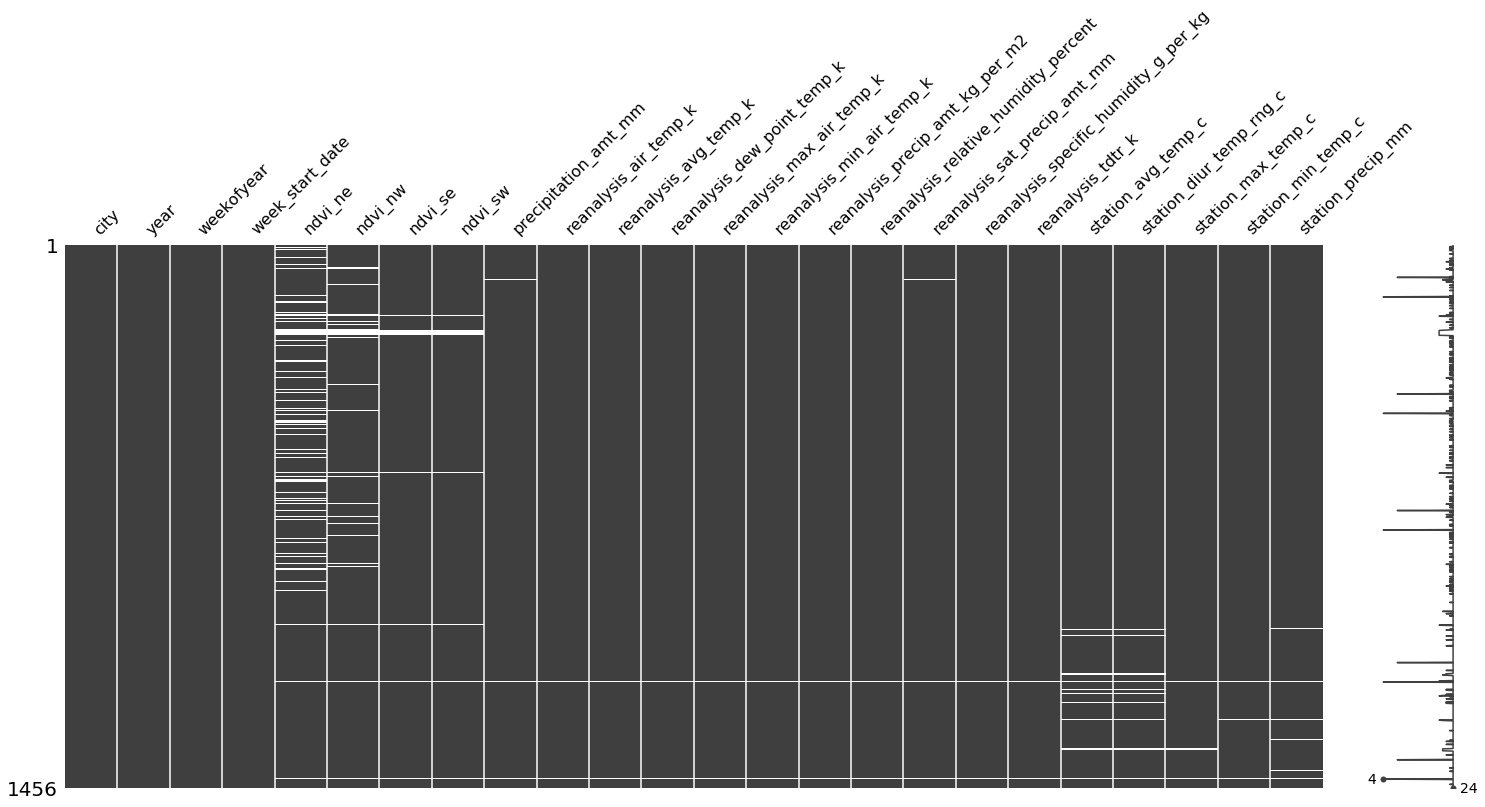

In [9]:
# View missing values
msno.matrix(data_features)

In [10]:
# Check for NA values
pd.isna(sj_features1).any()

ndvi_ne                                  True
ndvi_nw                                  True
ndvi_se                                  True
ndvi_sw                                  True
precipitation_amt_mm                     True
reanalysis_air_temp_k                    True
reanalysis_avg_temp_k                    True
reanalysis_dew_point_temp_k              True
reanalysis_max_air_temp_k                True
reanalysis_min_air_temp_k                True
reanalysis_precip_amt_kg_per_m2          True
reanalysis_relative_humidity_percent     True
reanalysis_sat_precip_amt_mm             True
reanalysis_specific_humidity_g_per_kg    True
reanalysis_tdtr_k                        True
station_avg_temp_c                       True
station_diur_temp_rng_c                  True
station_max_temp_c                       True
station_min_temp_c                       True
station_precip_mm                        True
dtype: bool

In [11]:
# Check for NA values
pd.isnull(iq_features1).any()

ndvi_ne                                  True
ndvi_nw                                  True
ndvi_se                                  True
ndvi_sw                                  True
precipitation_amt_mm                     True
reanalysis_air_temp_k                    True
reanalysis_avg_temp_k                    True
reanalysis_dew_point_temp_k              True
reanalysis_max_air_temp_k                True
reanalysis_min_air_temp_k                True
reanalysis_precip_amt_kg_per_m2          True
reanalysis_relative_humidity_percent     True
reanalysis_sat_precip_amt_mm             True
reanalysis_specific_humidity_g_per_kg    True
reanalysis_tdtr_k                        True
station_avg_temp_c                       True
station_diur_temp_rng_c                  True
station_max_temp_c                       True
station_min_temp_c                       True
station_precip_mm                        True
dtype: bool

In [12]:
# Fill NA values 
sj_features1.fillna(method='ffill', inplace=True)
iq_features1.fillna(method='ffill', inplace=True)

In [13]:
# Check distribution of train data labels 
print('San Juan')
print('mean: ', sj_train_labels.mean()[0])
print('var :', sj_train_labels.var()[0])

print('\nIquitos')
print('mean: ', iq_train_labels.mean()[0])
print('var :', iq_train_labels.var()[0])

San Juan
mean:  36.53538050734313
var : 3028.2063000221187

Iquitos
mean:  7.076923076923077
var : 111.06394810009282


Note: variance >> mean suggests total_cases can be described by a negative binomial distribution. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B263C95448>]],
      dtype=object)

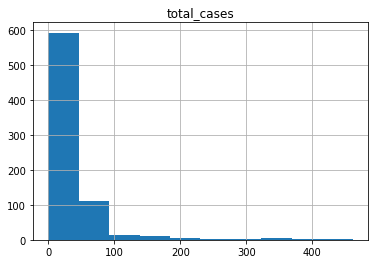

In [14]:
# Plot distribution of train data labels
sj_train_labels.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B263C95548>]],
      dtype=object)

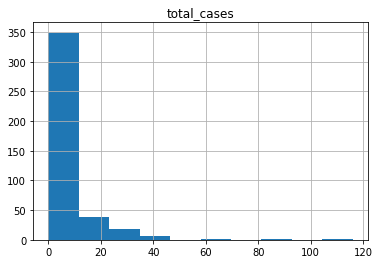

In [15]:
iq_train_labels.hist()

### Selection of subset of features for regression 

In [16]:
# Add train data labels to the train features dataset
sj_features1['total_cases'] = sj_train_labels.total_cases
iq_features1['total_cases'] = iq_train_labels.total_cases

In [17]:
# Compute correlation matrices
sj_correlate = sj_features1.corr()
iq_correlate = iq_features1.corr()

Text(0.5, 1, 'San Juan Variable Correlations')

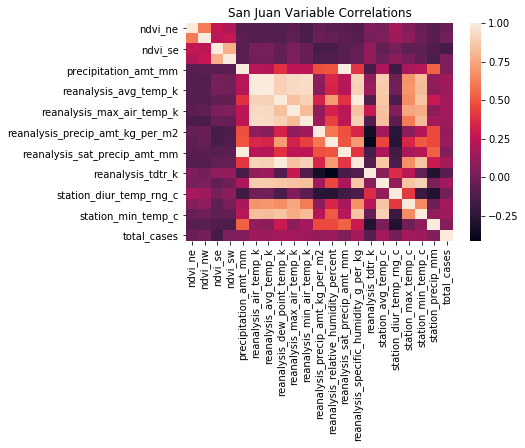

In [18]:
# Plot SJ correlation heatmap
sj_corr_heat = sns.heatmap(sj_correlate)
plt.title('San Juan Variable Correlations')

Text(0.5, 1, 'Iquitos Variable Correlations')

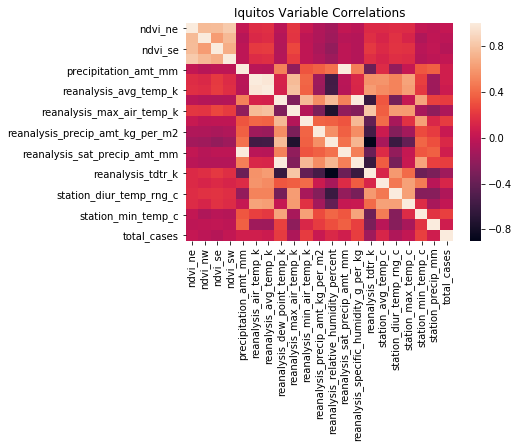

In [19]:
# Plot IQ correlation heatmap 
iq_corr_heat = sns.heatmap(iq_correlate)
plt.title('Iquitos Variable Correlations')

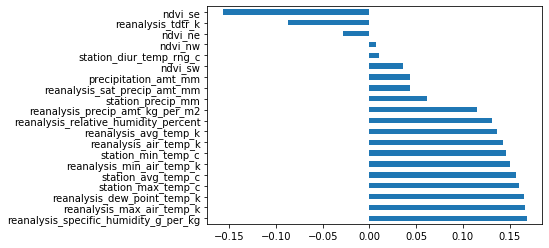

In [20]:
# SJ correlation hisotgram
(sj_correlate.total_cases.drop('total_cases').sort_values(ascending=False).plot.barh())

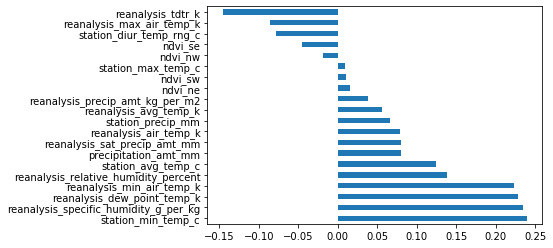

In [21]:
# IQ correlation hisotgram
(iq_correlate.total_cases.drop('total_cases').sort_values(ascending=False).plot.barh())

Based on the above bar histograms, the features which correlate most with total_cases is reanalysis_specific_humidity_g_per_kg and reanalysis_dew_point_temp_k

## Holt Winters
Has 3 major aspects for performing the predictions:

Exponential Smoothing: Simple exponential smoothing as the name suggest is used for forecasting when the data set has no trends or seasonality.

Holt’s Smoothing method: Holt’s smoothing technique, also known as linear exponential smoothing, is a widely known smoothing model for forecasting data that has a trend. For the trend, there are two models available, namely additive and multiplicative. Additive model is used when the trend component is more constant over time. Example, every year 200 more people get dengue. Multiplicative model is used when the trend increases/decreases at a non linear rate. For example, every year the number of dengue cases doubles by 20,000.

Winter’s Smoothing method: Winter’s smoothing technique allows us to include seasonality while making the prediction along with the trend.

Span corresponds to what is commonly called an “N-day Exponentially Weighted Moving Average”. EWMA allows to reduce the lag by putting more weight to the recent readings or values. The amount of weight applied is dependent on the actual parameters in the EWMA and the number of periods given in a window size.

Alpha specifies the smoothing factor directly.

Our dataset contains data points with 0 as the total_cases. The multiplicative model for Holt Winter trend requires strictly positive data as it is calculated as division of two data points rather than subtraction (in the case of the additive).

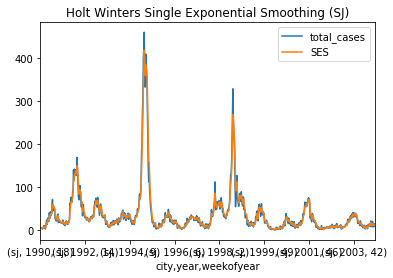

In [22]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

span = 3
alpha = 2/(span+1)

#Simple Exponential Smoothing (SJ)
sj_features1['SES'] = SimpleExpSmoothing(sj_features1['total_cases']).fit(smoothing_level=alpha,optimized=False).fittedvalues.shift(-1)
sj_features1[['total_cases','SES']].plot(title='Holt Winters Single Exponential Smoothing (SJ)');

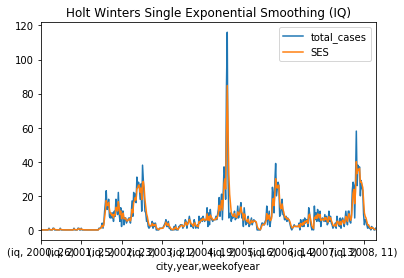

In [23]:
#Simple Exponential Smoothing (IQ)
iq_features1['SES'] = SimpleExpSmoothing(iq_features1['total_cases']).fit(smoothing_level=alpha,optimized=False).fittedvalues.shift(-1)
iq_features1[['total_cases','SES']].plot(title='Holt Winters Single Exponential Smoothing (IQ)');

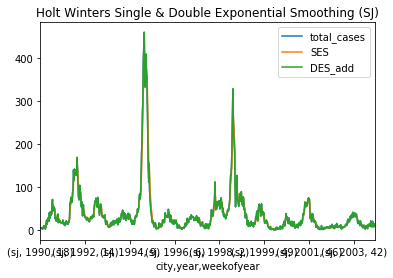

In [24]:
#Double Exponential Smoothing (Additive) (SJ)
sj_features1['DES_add'] = ExponentialSmoothing(sj_features1['total_cases'],trend='add').fit().fittedvalues.shift(-1)
sj_features1[['total_cases','SES', 'DES_add']].plot(title='Holt Winters Single & Double Exponential Smoothing (SJ)')

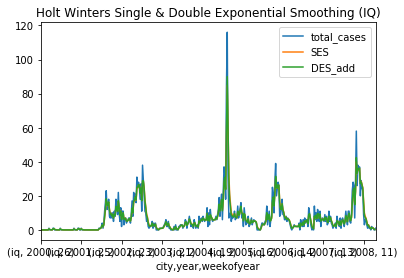

In [25]:
#Double Exponential Smoothing (Additive) (IQ)
iq_features1['DES_add'] = ExponentialSmoothing(iq_features1['total_cases'],trend='add').fit().fittedvalues.shift(-1)
iq_features1[['total_cases','SES', 'DES_add']].plot(title='Holt Winters Single & Double Exponential Smoothing (IQ)')

In [26]:
#from statsmodels.tsa.seasonal import seasonal_decompose

#decompose_result = seasonal_decompose(sj_features1['total_cases'],model='additive')
#decompose_result.plot()

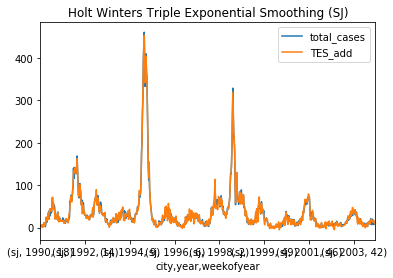

In [56]:
#Triple Exponential Smoothing (Additive) (SJ)
sj_features1['TES_add'] = ExponentialSmoothing(sj_features1['total_cases'],trend='add', seasonal='add',seasonal_periods=52).fit().fittedvalues.shift(-1)
sj_features1[['total_cases','TES_add']].plot(title='Holt Winters Triple Exponential Smoothing (SJ)')

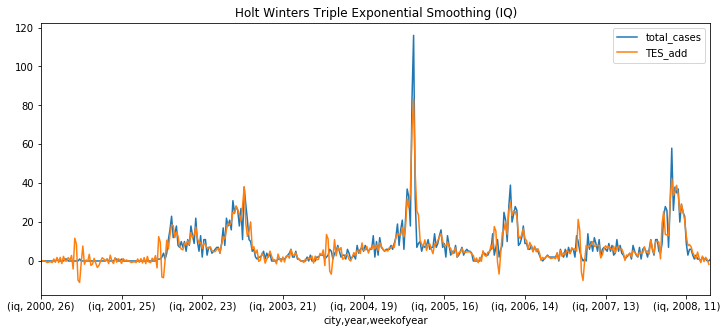

In [55]:
#Triple Exponential Smoothing (Additive) (IQ)
iq_features1['TES_add'] = ExponentialSmoothing(iq_features1['total_cases'],trend='add',seasonal='add',seasonal_periods=52).fit().fittedvalues.shift(-1)
iq_features1[['total_cases', 'TES_add']].plot(title='Holt Winters Triple Exponential Smoothing (IQ)', figsize=(12,5))

## Fitting Model onto Training Sets

In [59]:
#Note: From data pre-processing, SJ and IQ test sets contains 187 rows and 104 rows respectively

fitted_modelSJ = ExponentialSmoothing(sj_features1['total_cases'],seasonal='add',seasonal_periods=52).fit()
test_predictionsSJ = fitted_modelSJ.forecast(187).rename('SJ Test Forecast')

fitted_modelIQ = ExponentialSmoothing(iq_features1['total_cases'],seasonal='add',seasonal_periods=52).fit()
test_predictionsIQ = fitted_modelIQ.forecast(104).rename('IQ Test Forecast')

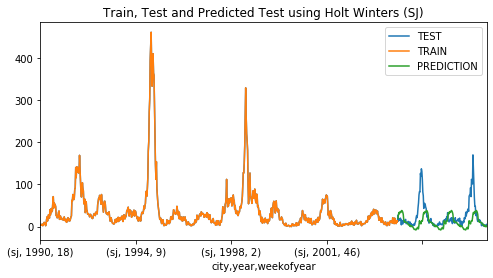

In [60]:
sj_labels['total_cases'].plot(legend=True,label='TEST')
sj_features1['total_cases'].plot(legend=True,label='TRAIN', figsize=(8,4))
test_predictionsSJ.plot(legend=True,label='PREDICTION')
plt.title('Train, Test and Predicted Test using Holt Winters (SJ)');

In [62]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(f'Mean Squared Error = {mean_squared_error(sj_test_labels,test_predictionsSJ)}')

Mean Squared Error = 1144.1154381857928


In [32]:
iq_labels = iq_labels.set_index(['city','year','weekofyear'])

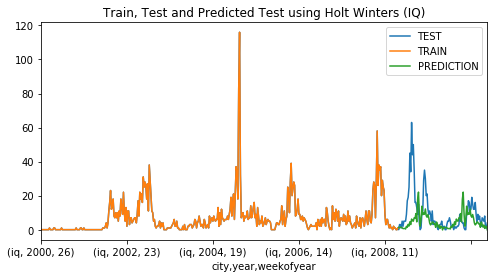

In [61]:
iq_labels['total_cases'].plot(legend=True,label='TEST')
iq_features1['total_cases'].plot(legend=True,label='TRAIN', figsize=(8,4))
test_predictionsIQ.plot(legend=True,label='PREDICTION')
plt.title('Train, Test and Predicted Test using Holt Winters (IQ)');

In [63]:
print(f'Mean Squared Error = {mean_squared_error(iq_test_labels,test_predictionsIQ)}')

Mean Squared Error = 145.91213313633472


## Time Series Split Cross Validation

In [66]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

tscv = TimeSeriesSplit(n_splits = 5)
mse = []
for train_index, test_index in tscv.split(sj_features1):
    cv_train, cv_test = sj_features1.iloc[train_index], sj_features1.iloc[test_index]
    
    hw = ExponentialSmoothing(sj_features1['total_cases'],seasonal='add',seasonal_periods=52).fit()
    
    predictions = hw.predict(cv_test.index.values[0], cv_test.index.values[-1])
    true_values = cv_test['total_cases'].values
    mse.append(mean_squared_error(true_values, predictions))
    
print("MSE: {}".format(np.mean(mse)))

MSE: 222.65190609851953


In [67]:
tscv = TimeSeriesSplit(n_splits = 5)
mse = []
for train_index, test_index in tscv.split(iq_features1):
    cv_train, cv_test = iq_features1.iloc[train_index], iq_features1.iloc[test_index]
    
    hw = ExponentialSmoothing(iq_features1['total_cases'],seasonal='add',seasonal_periods=52).fit()
    
    predictions = hw.predict(cv_test.index.values[0], cv_test.index.values[-1])
    true_values = cv_test['total_cases'].values
    mse.append(mean_squared_error(true_values, predictions))
    
print("MSE: {}".format(np.mean(mse)))

MSE: 53.84336939786577
